In [1]:
import Pkg
Pkg.activate("../.")


"/home/mark/devel/InterpolatedRejectionSampling/Project.toml"

In [2]:
X = range(0, π, length=10)
Y = range(0, π/4, length=9)
knots = (X,Y)
prob = [sin(x)+tan(y) for x in X, y in Y]

10×9 Array{Float64,2}:
 0.0          0.0984914  0.198912  0.303347  …  0.668179  0.820679  1.0    
 0.34202      0.440512   0.540933  0.645367     1.0102    1.1627    1.34202
 0.642788     0.741279   0.8417    0.946134     1.31097   1.46347   1.64279
 0.866025     0.964517   1.06494   1.16937      1.5342    1.6867    1.86603
 0.984808     1.0833     1.18372   1.28815      1.65299   1.80549   1.98481
 0.984808     1.0833     1.18372   1.28815   …  1.65299   1.80549   1.98481
 0.866025     0.964517   1.06494   1.16937      1.5342    1.6867    1.86603
 0.642788     0.741279   0.8417    0.946134     1.31097   1.46347   1.64279
 0.34202      0.440512   0.540933  0.645367     1.0102    1.1627    1.34202
 1.22465e-16  0.0984914  0.198912  0.303347     0.668179  0.820679  1.0    

┌ Info: Recompiling stale cache file /home/mark/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


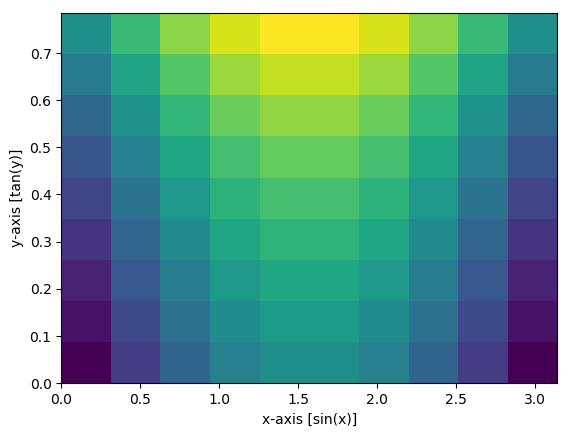

In [3]:
using PyPlot
imshow(transpose(prob);
       extent = (knots[1][1], knots[1][end], knots[2][1], knots[2][end]),
       aspect = "auto",
       origin = "lower")
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

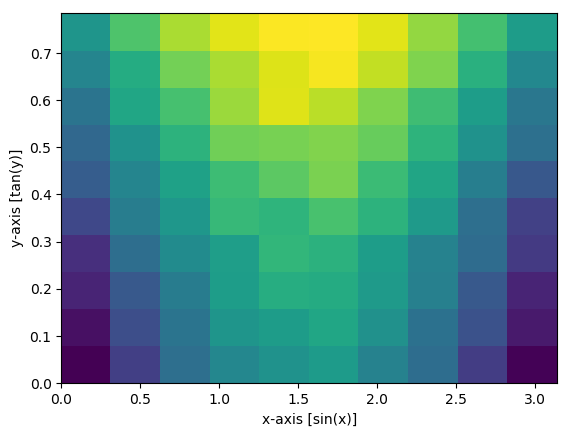

In [4]:
using InterpolatedRejectionSampling
n = 100_000
xy = irsample(knots,prob,n)
hist2D(xy[1,:],xy[2,:])
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

## throw away every other x or y

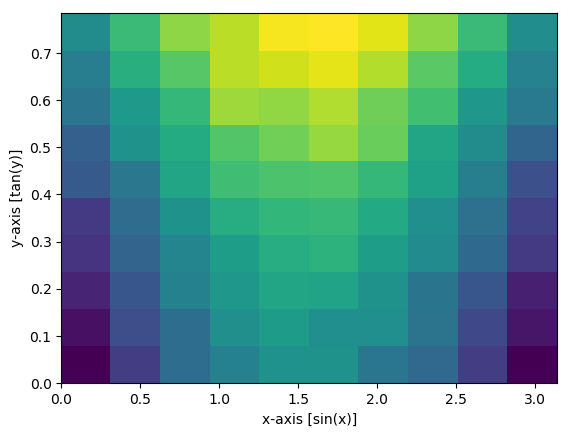

In [5]:
xy = convert(Matrix{Union{Missing,Float64}}, xy)
for i = 1:n
    if iseven(i)
        xy[1,i] = missing
    else
        xy[2,i] = missing
    end
end
irsample!(xy,knots,prob)
hist2D(xy[1,:],xy[2,:])
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

## Benchmarking

In [6]:
using BenchmarkTools
for i = 1:n
    if iseven(i)
        xy[1,i] = missing
    else
        xy[2,i] = missing
    end
end
@benchmark irsample!(xy,knots,prob)

BenchmarkTools.Trial: 
  memory estimate:  29.86 MiB
  allocs estimate:  600029
  --------------
  minimum time:     43.686 ms (4.48% GC)
  median time:      46.023 ms (4.69% GC)
  mean time:        48.114 ms (7.55% GC)
  maximum time:     112.981 ms (51.23% GC)
  --------------
  samples:          104
  evals/sample:     1

In [7]:
using BenchmarkTools
@benchmark irsample(knots,prob,n)

BenchmarkTools.Trial: 
  memory estimate:  37.66 MiB
  allocs estimate:  735487
  --------------
  minimum time:     27.273 ms (6.16% GC)
  median time:      29.676 ms (11.63% GC)
  mean time:        31.125 ms (11.67% GC)
  maximum time:     100.308 ms (62.43% GC)
  --------------
  samples:          161
  evals/sample:     1

In [8]:
using BenchmarkTools
@benchmark irsample(X,sin.(X),n)

BenchmarkTools.Trial: 
  memory estimate:  7.19 MiB
  allocs estimate:  143
  --------------
  minimum time:     6.809 ms (0.00% GC)
  median time:      7.327 ms (0.00% GC)
  mean time:        7.811 ms (5.67% GC)
  maximum time:     76.786 ms (87.52% GC)
  --------------
  samples:          640
  evals/sample:     1